In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

version = 'v20251113'

do = pd.read_csv('./data/lucas_preprocessed_v20251113.csv')
df = pd.read_csv('./eval/04a_hybridBD_cv.pred.csv')


print(df.shape)
target_names = ['SOCconc','CF','BD','SOCdensity']
# scalers = {'SOCconc':0.151,'CF':0.263,'BD':0.529,'SOCdensity':0.167} # current
scalers = {'SOCconc':0.158,'CF':2.2,'BD':0.52,'SOCdensity':0.165} # old problematic

# for tgt in target_names:
#     if tgt in ['SOCconc','CF']:
#         yv = np.log1p(do[tgt].dropna())
#     elif tgt=='SOCdensity':
#         yv = np.log(do[tgt].dropna())
#     else:
#         yv = do[tgt].dropna()
        
#     plt.figure()  # Create a new figure for each target
#     mm = np.max(yv)
#     ss = 1/mm
#     sc = scalers.get(tgt)
#     print(np.max(yv*sc), sc)
#     plt.hist(yv*sc, bins=20, edgecolor='black')
#     plt.title(f"Histogram of {tgt}, {mm:.3f}")
#     plt.xlabel(tgt)
#     plt.ylabel("Frequency")
#     plt.show()


(61288, 388)


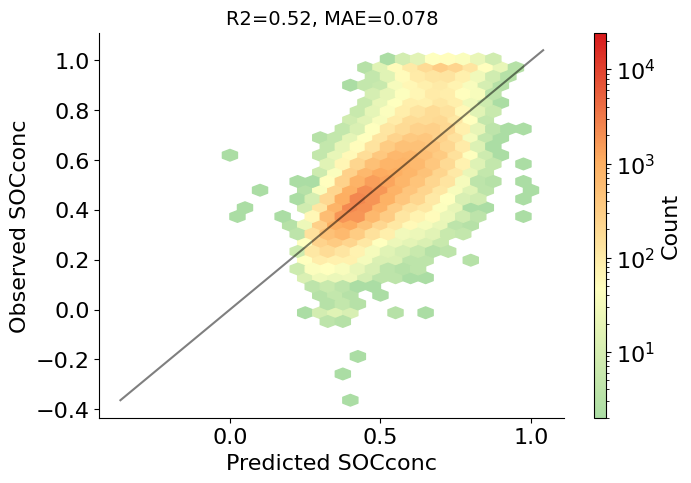

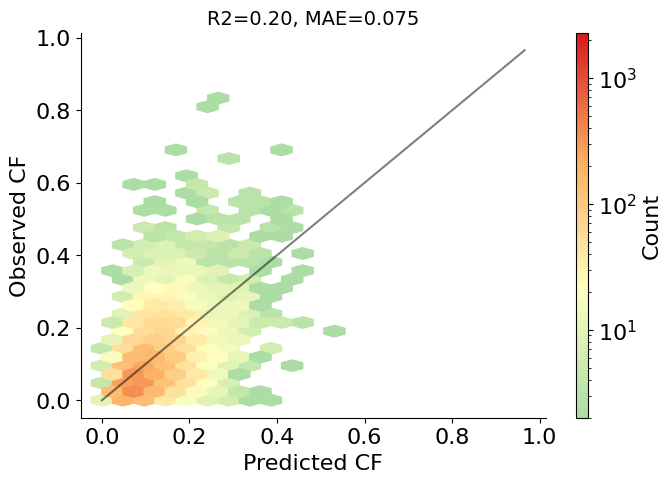

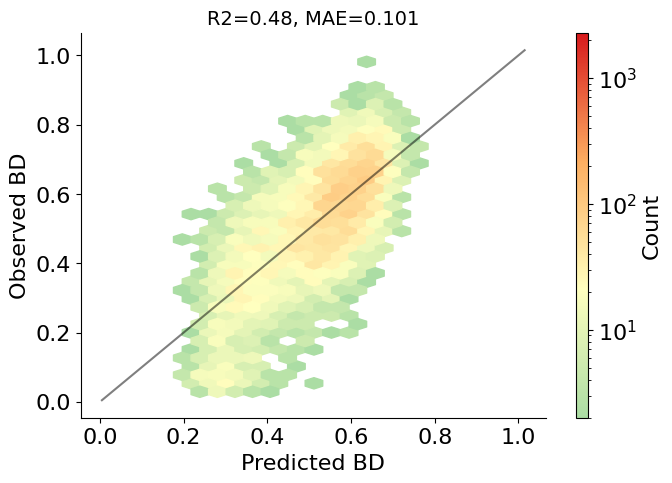

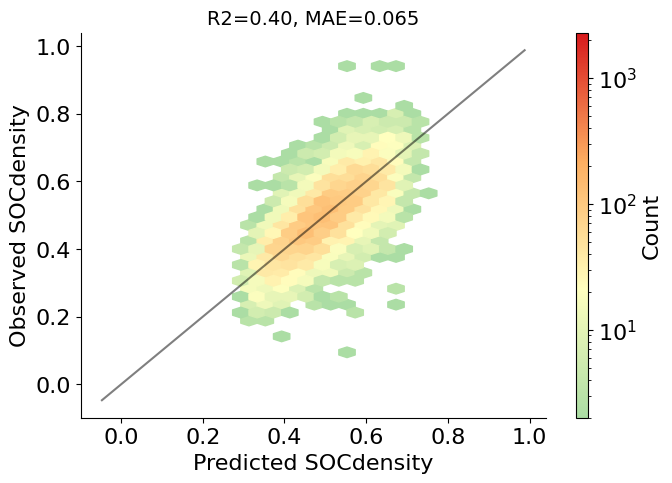

In [2]:
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

cet_l19_cmap = LinearSegmentedColormap.from_list("CET-L19", ["#abdda4", "#ffffbf", "#fdae61", "#d7191c"])

for tgt in target_names:
    y_all = df[tgt]
    yhat_all = df[f'pred_{tgt}']
    
    mask = y_all.notna() & yhat_all.notna()
    y_all = y_all[mask]
    yhat_all = yhat_all[mask]
    
    r2 = r2_score(y_all, yhat_all)
    mae = mean_absolute_error(y_all, yhat_all)

    show_range = [
    np.min([y_all.min(), yhat_all.min()]),
    np.max([y_all.max(), yhat_all.max()])]
    vmax = 0.4 * len(y_all)

    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(6, 5))

    # ax.set_title(f'RMSE={rmse:.2f}, CCC={ccc:.2f}, bias={bias:.2f}')

    # Use the CET-L19 colorblind-friendly colormap
    hb = ax.hexbin(yhat_all, y_all, gridsize=(20, 20), cmap=cet_l19_cmap, mincnt=2, vmax=vmax, bins='log')
    ax.set_xlabel(f'Predicted {tgt}')
    ax.set_ylabel(f'Observed {tgt}')
    ax.set_aspect('auto', adjustable='box')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.plot(show_range, show_range, "-k", alpha=.5)

    ax.set_title(f'R2={r2:.2f}, MAE={mae:.3f}', fontsize=14)

    # Create a colorbar with proper spacing
    cax = fig.add_axes([ax.get_position().x1 + 0.05, ax.get_position().y0, 0.02, ax.get_position().height])
    cb = fig.colorbar(hb, cax=cax)
    cb.set_label('Count')

    # plt.tight_layout(rect=[0, 0, 0.92, 1])  # Adjust the right margin to make room for colorbar
    # plt.savefig(f'{data_path}/plot_{tgt}_benchmark_{version}.pdf', format='pdf', bbox_inches='tight', dpi=300)



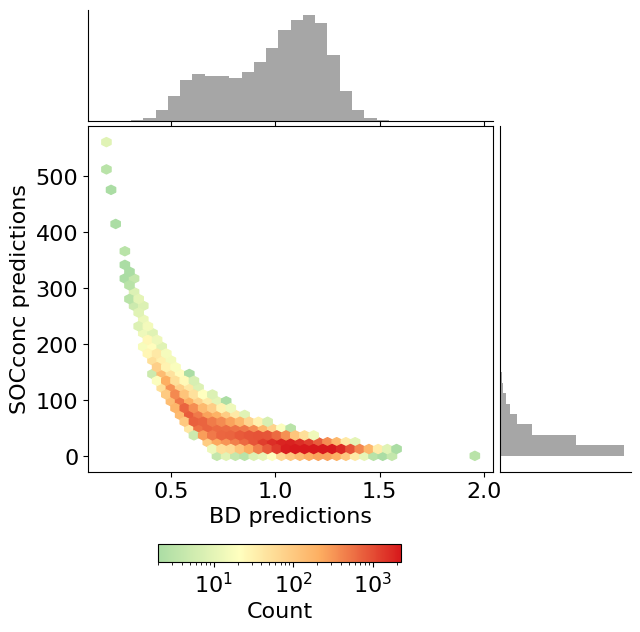

In [15]:
import matplotlib.gridspec as gridspec

x = df['pred_BD'] / scalers.get('BD')
y = np.exp(df['pred_SOCconc'] / scalers.get('SOCconc'))

plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(7, 6))
gs = gridspec.GridSpec(4, 4, figure=fig, wspace=0.05, hspace=0.05)

# Main hexbin plot
ax_main = fig.add_subplot(gs[1:4, 0:3])
# Top histogram (for x)
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
# Right histogram (for y)
ax_yhist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)


hb = ax_main.hexbin(x, y, gridsize=40, cmap=cet_l19_cmap, mincnt=2, vmax=vmax, bins='log')

ax_xhist.hist(x, bins=30, color='gray', alpha=0.7)
ax_yhist.hist(y, bins=30, orientation='horizontal', color='gray', alpha=0.7)

ax_xhist.tick_params(axis='x', labelbottom=False)
ax_xhist.tick_params(axis='y', left=False, labelleft=False)
ax_yhist.tick_params(axis='x', bottom=False, labelbottom=False)
ax_yhist.tick_params(axis='y', left=False, labelleft=False)

ax_xhist.spines['right'].set_visible(False)
ax_xhist.spines['top'].set_visible(False)
ax_yhist.spines['right'].set_visible(False)
ax_yhist.spines['top'].set_visible(False)
ax_xhist.tick_params(axis='x', labelbottom=False)
ax_yhist.tick_params(axis='y', labelleft=False)

ax_main.set_xlabel('BD predictions')
ax_main.set_ylabel('SOCconc predictions')
ax_main.set_title('BD vs. SOCconc')

cax = fig.add_axes([
    ax_main.get_position().x0+ 0.1,                      # left aligned with main plot
    ax_main.get_position().y0 - 0.15,               # slightly below main plot
    ax_main.get_position().width*0.6,                   # same width
    0.03                                             # height of colorbar
])
cb = fig.colorbar(hb, cax=cax, orientation='horizontal')
cb.set_label('Count')

plt.show()


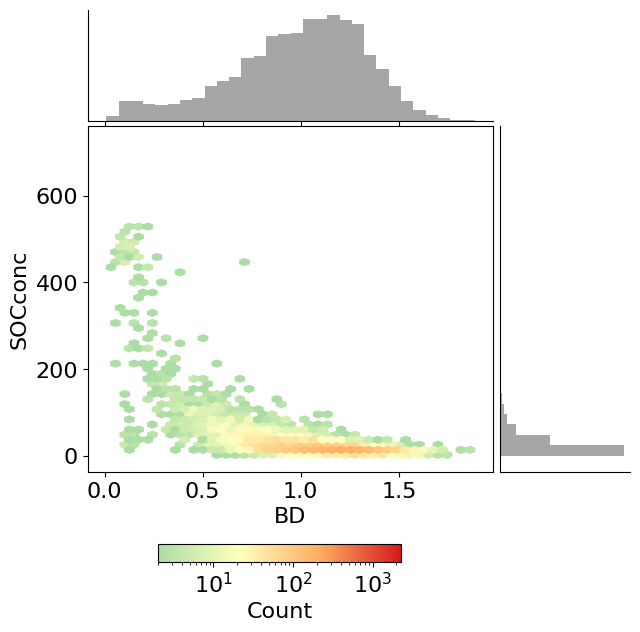

In [16]:
import matplotlib.gridspec as gridspec

x = df['BD'] / scalers.get('BD')
y = np.exp(df['SOCconc'] / scalers.get('SOCconc'))

plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(7, 6))
gs = gridspec.GridSpec(4, 4, figure=fig, wspace=0.05, hspace=0.05)

# Main hexbin plot
ax_main = fig.add_subplot(gs[1:4, 0:3])
# Top histogram (for x)
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
# Right histogram (for y)
ax_yhist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)


hb = ax_main.hexbin(x, y, gridsize=40, cmap=cet_l19_cmap, mincnt=2, vmax=vmax, bins='log')

ax_xhist.hist(x, bins=30, color='gray', alpha=0.7)
ax_yhist.hist(y, bins=30, orientation='horizontal', color='gray', alpha=0.7)

ax_xhist.tick_params(axis='x', labelbottom=False)
ax_xhist.tick_params(axis='y', left=False, labelleft=False)
ax_yhist.tick_params(axis='x', bottom=False, labelbottom=False)
ax_yhist.tick_params(axis='y', left=False, labelleft=False)

ax_xhist.spines['right'].set_visible(False)
ax_xhist.spines['top'].set_visible(False)
ax_yhist.spines['right'].set_visible(False)
ax_yhist.spines['top'].set_visible(False)
ax_xhist.tick_params(axis='x', labelbottom=False)
ax_yhist.tick_params(axis='y', labelleft=False)

ax_main.set_xlabel('BD')
ax_main.set_ylabel('SOCconc')
ax_main.set_title('BD vs. SOCconc')

cax = fig.add_axes([
    ax_main.get_position().x0+ 0.1,                      # left aligned with main plot
    ax_main.get_position().y0 - 0.15,               # slightly below main plot
    ax_main.get_position().width*0.6,                   # same width
    0.03                                             # height of colorbar
])
cb = fig.colorbar(hb, cax=cax, orientation='horizontal')
cb.set_label('Count')

plt.show()